In [1]:
import sys

sys.path.append('..')
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sizes = [round(0.2 * i, 1) for i in range(1, 6)]
data = []
for size in sizes:
  df = pd.read_csv(f'../results/tiny_{size}.csv')
  row = df[df['type'] == 'test'].drop(columns=['epoch', 'type']).iloc[0]
  row['size'] = size
  data.append(row)
df = pd.DataFrame(data)

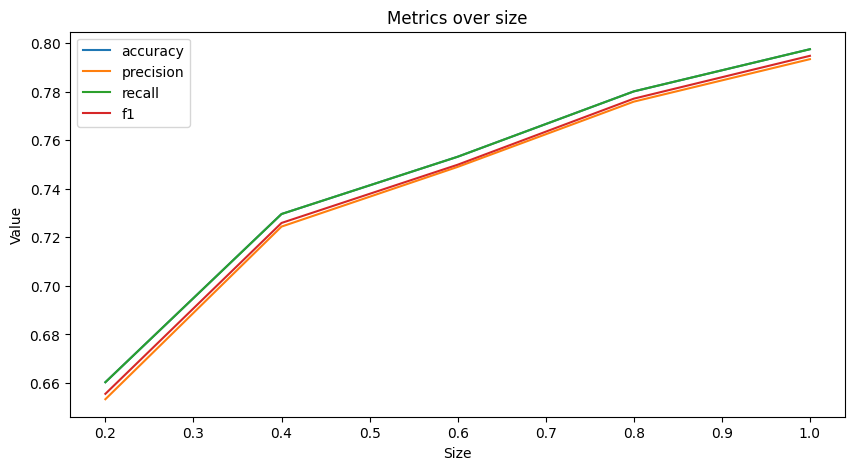

In [14]:
# metrics over sizes
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(data=df, x='size', y='accuracy', ax=ax, label='accuracy')
sns.lineplot(data=df, x='size', y='precision', ax=ax, label='precision')
sns.lineplot(data=df, x='size', y='recall', ax=ax, label='recall')
sns.lineplot(data=df, x='size', y='f1', ax=ax, label='f1')
ax.set_title('Metrics over size')
ax.set_xlabel('Size')
ax.set_ylabel('Value')
plt.show()

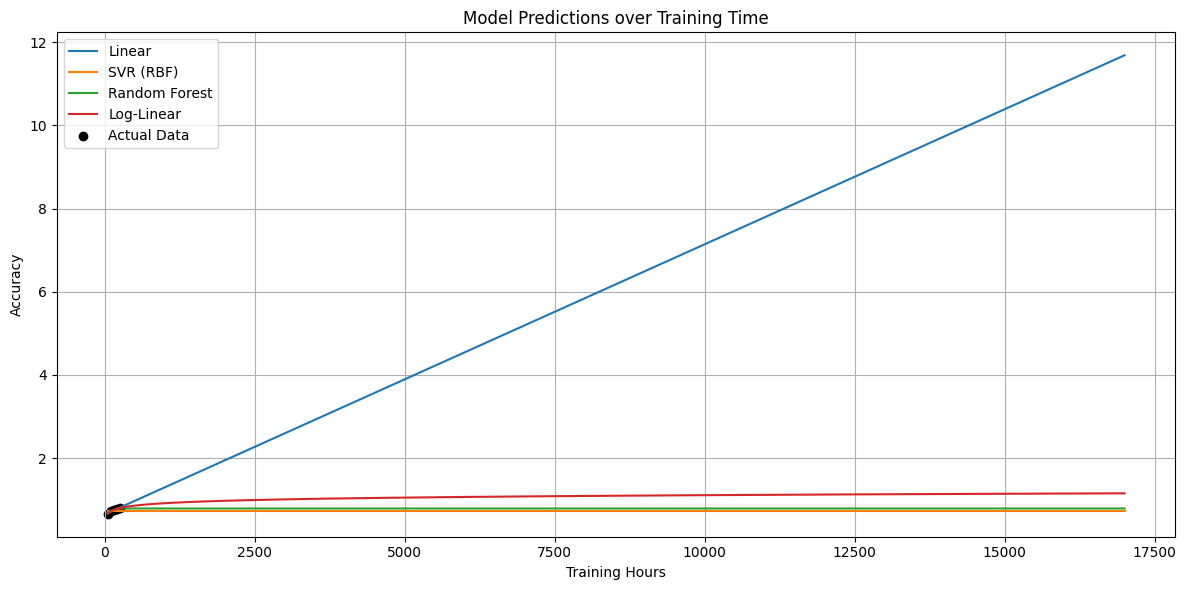

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Assume df is already loaded
df['hours'] = df['size'] * 250
X = df['hours'].values.astype(int).reshape(-1, 1)
y = df['accuracy'].values

# Range to predict over
X_range = np.linspace(X.min(), 17000, 300).reshape(-1, 1)

# Models
models = {}

# Linear Regression
lin = LinearRegression().fit(X, y)
models['Linear'] = lin.predict(X_range)

"""
# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X, y)
models['Polynomial (deg=2)'] = poly_model.predict(X_range)"
"""

# SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)
models['SVR (RBF)'] = svr.predict(X_range)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
models['Random Forest'] = rf.predict(X_range)

"""
# MLP
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X, y)
models['MLP'] = mlp.predict(X_range)"
"""

# Log-Linear
X_log = np.log(X)
X_range_log = np.log(X_range)
log_model = LinearRegression().fit(X_log, y)
models['Log-Linear'] = log_model.predict(X_range_log)

plt.figure(figsize=(12, 6))
for name, y_pred in models.items():
  plt.plot(X_range, y_pred, label=name)

plt.scatter(X, y, color='black', label='Actual Data')

plt.xlabel('Training Hours')
plt.ylabel('Accuracy')
plt.title('Model Predictions over Training Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()